# CE 263N Final Project: Bay Area Water Network Analysis
Talia Arauzo & Sydney Holgado

### Import Libraries

In [3]:
from sub_network import subWESTnet  # Note: class from CE 110 lab
import networkx as nx
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json, urllib, ast
import pydot
# !pip install powerlaw
import powerlaw
# !pip install momepy
import momepy

### Initialize Network

#### San Francisco Network

Import 2010 UWMP data projections for 2020

In [4]:
sf_network = subWESTnet('data/fixed_times_erl.csv', 2020)

Build SFPUC source network
<br><b>Note:</b> "sf_network.graph" is a networkx MultiDiGraph

In [5]:
sf_network.upstream("San Francisco Public Utilities Commission")

Unweighted upstream graph built.


Visualize SFPUC network

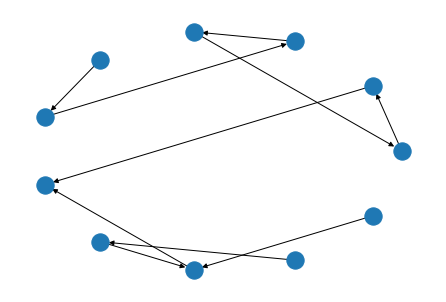

In [6]:
nx.draw_circular(sf_network.graph)

Convert network to non-multi-edge network
<br><b>Note:</b> "sf" is a networkx DiGraph

In [7]:
sf = nx.DiGraph(sf_network.graph)

SFPUC network data

In [8]:
sf_network.table()

,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
0,SW1805081PEN,1805081PD,206239.87350,8.000000,26.00,84558.34814
1,SW1805081SYS,SW1805081EB,11469.00000,0.700000,0.00,0.00000
2,R_Tuolumn,RES1805081,10000.00000,0.000000,0.00,0.00000
3,RES1805081,SW1805081SYS,7687.00000,0.000000,0.00,0.00000
4,SW1805081EB,SW1805081PEN,296955.55500,113.200000,0.00,0.00000
5,1805081PD,San Francisco Public Utilities Commission,84558.34814,318.200000,0.00,84558.34814
6,1805081REC,1805081NPD,2285.17740,0.000000,236.00,2285.17740
7,WWT1805081,1805081REC,2285.17740,108.000000,0.00,2285.17740
8,WESTSIDE,1805081NPD,5600.00000,352.000000,181.75,2296.00000
9,1805081NPD,San Francisco Public Utilities Commission,4581.17740,349.944828,0.00,4581.17740


#### Alameda Network

Import 2010 UWMP data projections for 2020

In [9]:
alameda_network = subWESTnet('data/fixed_times_erl.csv', 2020)

Build Alameda source network
<br><b>Note:</b> "alameda_network.graph" is a networkx MultiDiGraph

In [10]:
alameda_network.upstream("Alameda County Water District")

Unweighted upstream graph built.


Visualize Alameda network

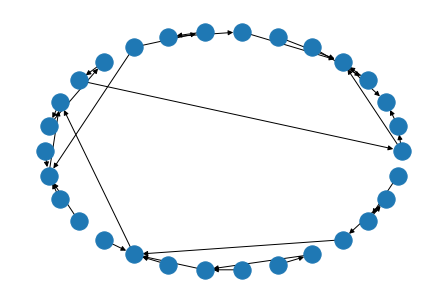

In [11]:
nx.draw_circular(alameda_network.graph)

Convert network to non-multi-edge network
<br><b>Note:</b> "alameda" is a networkx DiGraph

In [12]:
alameda = nx.DiGraph(alameda_network.graph)

Alameda network data

In [13]:
alameda_network.table()

,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
0,SW1805SWP08,GWR1805-2-09.01,2.540000e+04,83.9285,447.732283,0.000000
1,GWR1805-2-09.01,Alameda County Water District,1.620000e+04,318.2000,0.000000,0.000000
2,NILES CONE,1805003PD,2.035749e+04,352.0000,181.750000,20357.487920
3,SANTA CLARA VALLEY,NILES CONE,2.035749e+04,0.0000,0.000000,20357.487920
4,RES_DELVALL,1805003PD,9.057005e+03,87.0000,224.000000,9057.004831
5,SW1805081EB,1805003PD,1.279614e+04,0.0000,26.000000,12796.135270
6,RES1805081,SW1805081SYS,7.687000e+03,0.0000,0.000000,0.000000
7,R_Tuolumn,RES1805081,1.000000e+04,0.0000,0.000000,0.000000
8,SW1805081SYS,SW1805081EB,1.146900e+04,0.7000,0.000000,0.000000
9,SW1805SWP08,1805003PD,9.389372e+03,83.9285,224.000000,9389.371981


#### San Jose Network

Import 2010 UWMP data projections for 2020

In [14]:
sj_network = subWESTnet('data/fixed_times_erl.csv', 2020)

Build San Jose source network
<br><b>Note:</b> "sj_network.graph" is a networkx MultiDiGraph

In [15]:
sj_network.upstream("San Jose Water Company")

Unweighted upstream graph built.


Visualize San Jose network

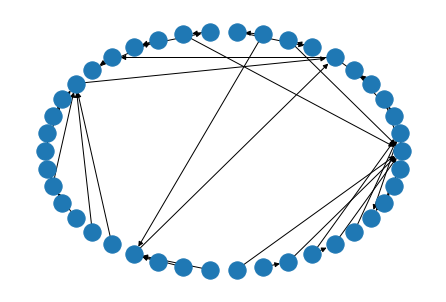

In [16]:
nx.draw_circular(sj_network.graph)

Convert network to non-multi-edge network
<br><b>Note:</b> "sj" is a networkx DiGraph

In [17]:
sj = nx.DiGraph(sj_network.graph)

SFPUC network data

In [18]:
sj_network.table()

,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
0,1805089PD,1805085PD,6.673160e+04,25.000,0.00,66166.16
1,SW1804SWP07,SW1805SWP08,5.863172e+04,965.235,0.00,0.00
2,SWP_SFBayDelta,SW1804SWP06,2.483696e+06,0.000,0.00,0.00
3,SFBayDelta,SWP_SFBayDelta,2.521429e+06,0.000,0.00,0.00
4,SW1804SWP06,SW1804SWP07,1.069150e+05,338.920,0.00,0.00
5,SW1805SWP08,1805089PD,6.021335e+04,25.000,88.00,41600.00
6,SW1805081SYS,SW1805081EB,1.146900e+04,0.700,0.00,0.00
7,R_Tuolumn,RES1805081,1.000000e+04,0.000,0.00,0.00
8,RES1805081,SW1805081SYS,7.687000e+03,0.000,0.00,0.00
9,SW1805081EB,1805089PD,5.993110e+04,0.000,88.00,41405.00


#### Bay Area Network

Overlapping edges in SFPUC & Alameda networks

In [19]:
sf_edges = list(sf.edges())
alameda_edges = list(alameda.edges())

In [20]:
overlap_edges_sf_alameda = [value for value in sf_edges if value in alameda_edges]
overlap_edges_sf_alameda

[('SW1805081SYS', 'SW1805081EB'),
 ('R_Tuolumn', 'RES1805081'),
 ('RES1805081', 'SW1805081SYS')]

Combine SFPUC, Alameda, & San Jose networks (no edge data)

In [21]:
sf_alameda = nx.compose(sf, alameda)
network = nx.compose(sf_alameda, sj)

First add SFPUC edge attributes

In [22]:
# Iterate over SFPUC edges to add attributes
for r in range(sf_network.table().shape[0]):
    # Edges
    source = sf_network.table().loc[r, "source"]
    target = sf_network.table().loc[r, "target"]
    # Edge attributes
    cum_vol = sf_network.table().loc[r, "cumulative_volume_af"]
    trans_kwh = sf_network.table().loc[r, "transmission_kwh/af"]
    treat_kwh = sf_network.table().loc[r, "treatment_kwh/af"]
    used_vol = sf_network.table().loc[r, "used_vol_af"]
    # Add edge attributes
    network[source][target]["cumulative_volume_af"] = cum_vol
    network[source][target]["transmission_kwh/af"] = trans_kwh
    network[source][target]["treatment_kwh/af"] = treat_kwh
    network[source][target]["used_vol_af"] = used_vol
    
# Check that attributes added properly
# network.get_edge_data('1805081PD', 'San Francisco Public Utilities Commission')

Second add Alameda edge attributes, aggregating with SFPUC edge attributes

In [23]:
# Iterate over SFPUC edges to add attributes
for r in range(alameda_network.table().shape[0]):
    # Edges
    source = alameda_network.table().loc[r, "source"]
    target = alameda_network.table().loc[r, "target"]
    # Edge attributes
    cum_vol = alameda_network.table().loc[r, "cumulative_volume_af"]
    trans_kwh = alameda_network.table().loc[r, "transmission_kwh/af"]
    treat_kwh = alameda_network.table().loc[r, "treatment_kwh/af"]
    used_vol = alameda_network.table().loc[r, "used_vol_af"]
    # Add edge attributes
    if (source, target) in overlap_edges_sf_alameda:
        network[source][target]["cumulative_volume_af"] = cum_vol + network.get_edge_data(source, target)["cumulative_volume_af"]
        network[source][target]["transmission_kwh/af"] = trans_kwh + network.get_edge_data(source, target)["transmission_kwh/af"]
        network[source][target]["treatment_kwh/af"] = treat_kwh + network.get_edge_data(source, target)["treatment_kwh/af"]
        network[source][target]["used_vol_af"] = used_vol + network.get_edge_data(source, target)["used_vol_af"]
    else:
        network[source][target]["cumulative_volume_af"] = cum_vol
        network[source][target]["transmission_kwh/af"] = trans_kwh
        network[source][target]["treatment_kwh/af"] = treat_kwh
        network[source][target]["used_vol_af"] = used_vol
    
# Check that attributes added properly
# network.get_edge_data('1805081PD', 'San Francisco Public Utilities Commission')

Overlapping edges in SFPUC & San Jose networks

In [24]:
sj_edges = list(sj.edges())

In [25]:
overlap_edges_sf_sj = [value for value in sj_edges if value in sf_edges]
overlap_edges_sf_sj

[('SW1805081SYS', 'SW1805081EB'),
 ('R_Tuolumn', 'RES1805081'),
 ('RES1805081', 'SW1805081SYS')]

Overlapping edges in Alameda & San Jose networks

In [26]:
overlap_edges_alameda_sj = [value for value in sj_edges if value in alameda_edges]
overlap_edges_alameda_sj

[('SW1804SWP07', 'SW1805SWP08'),
 ('SWP_SFBayDelta', 'SW1804SWP06'),
 ('SW1804SWP06', 'SW1804SWP07'),
 ('SFBayDelta', 'SWP_SFBayDelta'),
 ('SW1805081SYS', 'SW1805081EB'),
 ('R_Tuolumn', 'RES1805081'),
 ('R_Tuolumn', 'R_SanJoaquin'),
 ('RES1805081', 'SW1805081SYS'),
 ('R_Sacramento', 'SFBayDelta'),
 ('SW1802SWP02', 'R_Feather'),
 ('R_Feather', 'R_Sacramento'),
 ('Lk_OrovilleSWP', 'SW1802SWP01'),
 ('SW1802SWP01', 'SW1802SWP02'),
 ('R_AmericanNFRK', 'R_American'),
 ('R_American', 'R_Sacramento'),
 ('R_AmericanMFRK', 'R_AmericanNFRK'),
 ('R_AmericanSFRK', 'R_American'),
 ('LK_TrinityCVP', 'R_Sacramento'),
 ('LK_ShastaCVP', 'R_Sacramento'),
 ('R_SanJoaquin', 'SFBayDelta'),
 ('R_Stanislaus', 'R_SanJoaquin'),
 ('R_Mokelumn', 'R_SanJoaquin'),
 ('R_Calaveras', 'R_SanJoaquin')]

Overlapping edges in SFPUC, Alameda, & San Jose networks

In [27]:
overlap_edges = overlap_edges_sf_sj
overlap_edges.extend(x for x in overlap_edges_alameda_sj if x not in overlap_edges)
overlap_edges

[('SW1805081SYS', 'SW1805081EB'),
 ('R_Tuolumn', 'RES1805081'),
 ('RES1805081', 'SW1805081SYS'),
 ('SW1804SWP07', 'SW1805SWP08'),
 ('SWP_SFBayDelta', 'SW1804SWP06'),
 ('SW1804SWP06', 'SW1804SWP07'),
 ('SFBayDelta', 'SWP_SFBayDelta'),
 ('R_Tuolumn', 'R_SanJoaquin'),
 ('R_Sacramento', 'SFBayDelta'),
 ('SW1802SWP02', 'R_Feather'),
 ('R_Feather', 'R_Sacramento'),
 ('Lk_OrovilleSWP', 'SW1802SWP01'),
 ('SW1802SWP01', 'SW1802SWP02'),
 ('R_AmericanNFRK', 'R_American'),
 ('R_American', 'R_Sacramento'),
 ('R_AmericanMFRK', 'R_AmericanNFRK'),
 ('R_AmericanSFRK', 'R_American'),
 ('LK_TrinityCVP', 'R_Sacramento'),
 ('LK_ShastaCVP', 'R_Sacramento'),
 ('R_SanJoaquin', 'SFBayDelta'),
 ('R_Stanislaus', 'R_SanJoaquin'),
 ('R_Mokelumn', 'R_SanJoaquin'),
 ('R_Calaveras', 'R_SanJoaquin')]

Lastly add San Jose edge attributes, aggregating with SFPUC & Alameda edge attributes

In [28]:
# Iterate over San Jose edges to add attributes
for r in range(sj_network.table().shape[0]):
    # Edges
    source = sj_network.table().loc[r, "source"]
    target = sj_network.table().loc[r, "target"]
    # Edge attributes
    cum_vol = sj_network.table().loc[r, "cumulative_volume_af"]
    trans_kwh = sj_network.table().loc[r, "transmission_kwh/af"]
    treat_kwh = sj_network.table().loc[r, "treatment_kwh/af"]
    used_vol = sj_network.table().loc[r, "used_vol_af"]
    # Add edge attributes
    if (source, target) in overlap_edges:
        network[source][target]["cumulative_volume_af"] = cum_vol + network.get_edge_data(source, target)["cumulative_volume_af"]
        network[source][target]["transmission_kwh/af"] = trans_kwh + network.get_edge_data(source, target)["transmission_kwh/af"]
        network[source][target]["treatment_kwh/af"] = treat_kwh + network.get_edge_data(source, target)["treatment_kwh/af"]
        network[source][target]["used_vol_af"] = used_vol + network.get_edge_data(source, target)["used_vol_af"]
    else:
        network[source][target]["cumulative_volume_af"] = cum_vol
        network[source][target]["transmission_kwh/af"] = trans_kwh
        network[source][target]["treatment_kwh/af"] = treat_kwh
        network[source][target]["used_vol_af"] = used_vol
    
# Check that attributes added properly
# network.get_edge_data('1805081PD', 'San Francisco Public Utilities Commission')

Visualize Bay Area network

Text(0.5, 0.98, '(Circular Visualization)')

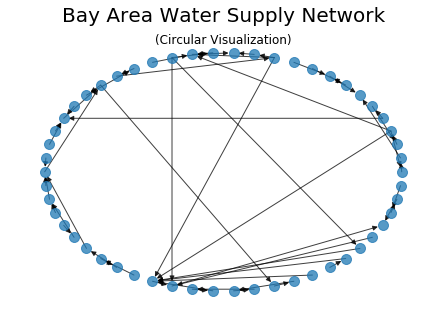

In [29]:
nx.draw_circular(network,node_size = 100, alpha = 0.75)
plt.title("Bay Area Water Supply Network",fontsize = 20)
plt.suptitle("(Circular Visualization)")

Bay Area network data

In [30]:
network_df = pd.DataFrame(list(network.edges.values()))
network_df["source_target"] = list(network.edges())
network_df[["source", "target"]] = network_df['source_target'].apply(pd.Series)
cols = ['source', 'target', 'cumulative_volume_af', 'transmission_kwh/af',
       'treatment_kwh/af', 'used_vol_af']
network_df = network_df[cols]
network_df

,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
0,SW1805081PEN,1805081PD,2.062399e+05,8.000000,26.000000,8.455835e+04
1,1805081PD,San Francisco Public Utilities Commission,8.455835e+04,318.200000,0.000000,8.455835e+04
2,SW1805081SYS,SW1805081EB,3.440700e+04,2.100000,0.000000,0.000000e+00
3,SW1805081EB,SW1805081PEN,2.969556e+05,113.200000,0.000000,0.000000e+00
4,SW1805081EB,1805003PD,1.279614e+04,0.000000,26.000000,1.279614e+04
5,SW1805081EB,1805089PD,5.993110e+04,0.000000,88.000000,4.140500e+04
6,R_Tuolumn,RES1805081,3.000000e+04,0.000000,0.000000,0.000000e+00
7,R_Tuolumn,R_SanJoaquin,2.000000e+05,0.000000,0.000000,0.000000e+00
8,RES1805081,SW1805081SYS,2.306100e+04,0.000000,0.000000,0.000000e+00
9,1805081REC,1805081NPD,2.285177e+03,0.000000,236.000000,2.285177e+03


In [31]:
network_df.to_excel("network_df.xlsx")

### Network Characteristics

Function for removing elemnts from a list if they equal a certain value

In [32]:
def remove_values_from_list(the_list, val):
    return [value for value in the_list if value != val]

Unweighted and weighted network degrees

In [33]:
# Non-zero unweighted degrees for each node in network
degrees = remove_values_from_list(list(dict(network.degree()).values()),0)

# Non-zero unweighted degrees for each node in network
w_degrees = remove_values_from_list(list(dict(network.degree(weight  = "cumulative_volume_af")).values()),0)

Distribution of weighted degree strenghts
<br><b>Note:</b> Appears to follow a power law $P(s) = s^{(-1.1)}$

In [34]:
# fig, ax = plt.subplots()
# fig.set_size_inches((9, 7))

# n_bins = 20
 
# out_logBins = np.logspace(np.log10(min(degrees)), np.log10(max(degrees)),num=n_bins)
# out_logBinDensity, out_binedges = np.histogram(degrees, bins=out_logBins, density=True)

# ax.loglog(out_logBins[:-1], out_logBinDensity, 's', color = "plum", markersize = 10, label = "Data")
# ax.loglog(out_logBins[:-1], out_logBins[:-1]**(-1.7), color = "c", label = "Power Law Fit")

# ax.set_title("Distribution of Degree Strengths - Network Weighted by Cumulative Volume", fontsize = 20)
# ax.set_xlabel('$strength, s$', fontsize=20)
# ax.set_ylabel('$P(s)$', fontsize=20)
# ax.legend(fontsize = 20);

Distribution of weighted degrees
<br><b>Note:</b> Appears to follow a power law $P(k) = k^{(-1.1)}$

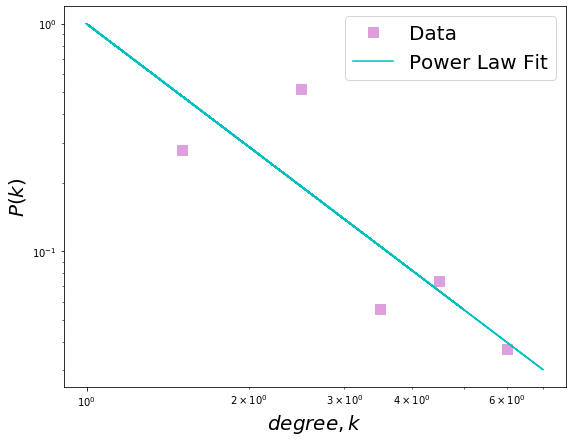

In [35]:
plt.figure(figsize = (9,7))
powerlaw.plot_pdf(degrees, color = "plum", marker = 's', markersize = 10, linestyle = "None", label='Data')
plt.loglog(degrees, np.array(degrees)**(-1.8), color = "c", label = "Power Law Fit")
plt.ylabel('$P(k)$', fontsize = 20)
plt.xlabel('$degree, k$', fontsize = 20)
plt.legend(loc = 'best', fontsize = 20);

Function for outputting network characteristics

In [36]:
def characteristics(degrees, network, name):
    print("---------", name, "Network---------")
    print("Minimum Degree: ", min(degrees))
    print("Maximum Degree: ", max(degrees))
    print("Average Degree: ", np.mean(degrees))
    print("Standard Deviation of Degrees: ", np.std(degrees))
    print("Average Clustering Coefficient: ", nx.average_clustering(network, weight = "weight"))
    print("Average Shortest Path Length: ", nx.average_shortest_path_length(network, weight = "weight"))

Characteristics of the unweighted network

In [37]:
characteristics(degrees, network, "Unweighted")

--------- Unweighted Network---------
Minimum Degree:  1
Maximum Degree:  7
Average Degree:  2.185185185185185
Standard Deviation of Degrees:  1.2483184849150162
Average Clustering Coefficient:  0.0
Average Shortest Path Length:  0.7641509433962265


Characteristics of the weighted network

In [38]:
characteristics(w_degrees, network, "Weighted")

--------- Weighted Network---------
Minimum Degree:  2285.1774
Maximum Degree:  13969208.0
Average Degree:  1746795.272436
Standard Deviation of Degrees:  3849441.0952137983
Average Clustering Coefficient:  0.0
Average Shortest Path Length:  0.7641509433962265


### Network Analysis & Paper Implementation

Function for calculating metrics as seen in paper:

In [39]:
def metrics(network, name):
    print("---------Metrics of", name,"---------")
    print("Meshedness: ", momepy.meshedness(network, radius = None, distance = "weight"))
    print("Average Path Length: ", nx.average_shortest_path_length(network, weight = "weight"))
    print("Average Clustering Coefficient: ", nx.average_clustering(network, weight = "weight"))
    centrality_dict = nx.betweenness_centrality(network, weight = "weight")
    centrality_vals = [v for _, v in centrality_dict.items()] 
    avg_centrality = sum(centrality_vals)/len(centrality_vals)
    print("Node Centrality: ", avg_centrality)
    #print("Node Centrality: ", nx.betweenness_centrality(network, weight = "weight"))
    

In [40]:
metrics(network, "Original Weighted Network")

---------Metrics of Original Weighted Network ---------
Meshedness:  0.05825242718446602
Average Path Length:  0.7641509433962265
Average Clustering Coefficient:  0.0
Node Centrality:  0.01163118851798097


### <br><b>Selectively fragment network and recalculate metrics:</b>
This removes each node, calculates the four metrics, then reconstructs the original network before removing the next node.

In [41]:
num_nodes = network.number_of_nodes()
mesh = np.empty(num_nodes)
avg_L = np.empty(num_nodes)
avg_CC = np.empty(num_nodes)
avg_centrality = np.empty(num_nodes)
node_list = list(network.nodes())

for i in range (0, num_nodes):
    net = network.copy()
    net.remove_node(node_list[i]) 
    mesh[i] = float(momepy.meshedness(net, radius = None, distance = "weight"))
    # Use largest connected component in network for average shortest path length
    sub_net = [net.subgraph(c).copy() for c in sorted(nx.connected_components(net.to_undirected()), key=len, reverse=True)][0]
    avg_L[i] = float(nx.average_shortest_path_length(sub_net, weight = "weight"))
    avg_CC[i] = nx.average_clustering(net, weight = "weight")
    centrality_dict = nx.betweenness_centrality(net, weight = "weight") 
    centrality_vals = [v for _, v in centrality_dict.items()] 
    avg_centrality[i] = max(centrality_vals) - sum(centrality_vals)/len(centrality_vals)
   
df = pd.DataFrame(data=[mesh, avg_L, avg_CC, avg_centrality],columns = [[node_list[i] for i in range(0,num_nodes)]],index=['mesh', 'avg_L', 'avg_CC', 'avg_centrality'])

<br><b>Note:<b/> 
The column labels of the dataframe correspond to the node *removed* in each column of analysis.

In [42]:
df

,SW1805081PEN,1805081PD,SW1805081SYS,SW1805081EB,R_Tuolumn,RES1805081,San Francisco Public Utilities Commission,1805081REC,1805081NPD,WWT1805081,...,SW_CVP-DMC,RES1805089,GILROY-HOLLISTER VALLEY,LLAGAS AREA,SANTA CLARA,RES_1805085,San Jose Water Company,1805085REC,1805085NPD,WWT1805083
mesh,0.049505,0.049505,0.049505,0.029703,0.049505,0.049505,0.049505,0.049505,0.039604,0.059406,...,0.049505,0.059406,0.059406,0.049505,0.049505,0.059406,0.049505,0.049505,0.049505,0.059406
avg_L,0.984274,0.947695,0.770682,1.012077,0.755080,0.779028,0.915391,0.821267,0.887347,0.791364,...,0.574383,0.791364,0.789913,0.818627,0.790276,0.792453,0.791020,0.821267,0.853725,0.791364
avg_CC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
avg_centrality,0.082551,0.082508,0.084493,0.084536,0.078766,0.084386,0.082465,0.082359,0.082366,0.082352,...,0.055750,0.082352,0.082373,0.082394,0.082359,0.082337,0.078125,0.082359,0.082359,0.082352


In [48]:
df.T.to_excel("network_metrics.xlsx")

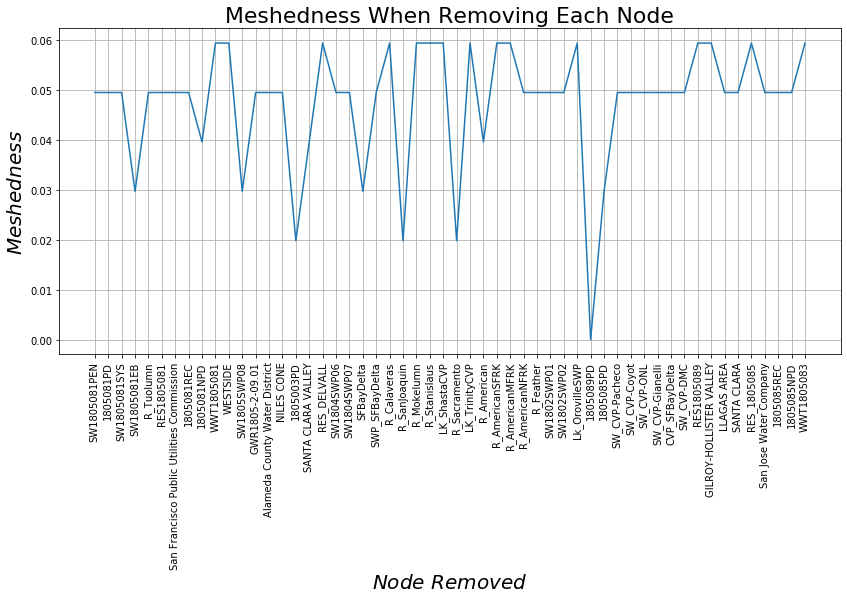

In [43]:
plt.figure(figsize = (14,6))
plt.plot(mesh)
plt.title('Meshedness When Removing Each Node',fontsize=22)
plt.xticks(np.arange(num_nodes), [node_list[i] for i in range(0,num_nodes)], rotation='vertical')
plt.xlabel('$Node$ $Removed$',fontsize=20)
plt.ylabel('$Meshedness$',fontsize=20)
plt.grid()
plt.show()

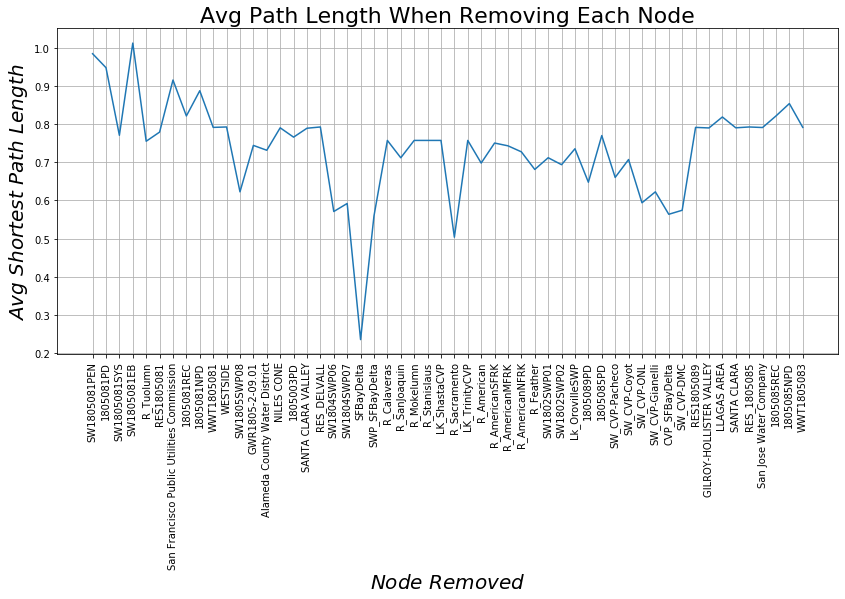

In [44]:
plt.figure(figsize = (14,6))
plt.plot(avg_L)
plt.title('Avg Path Length When Removing Each Node',fontsize=22)
plt.xticks(np.arange(num_nodes), [node_list[i] for i in range(0,num_nodes)], rotation='vertical')
plt.xlabel('$Node$ $Removed$',fontsize=20)
plt.ylabel('$Avg$ $Shortest$ $Path$ $Length$',fontsize=20)
plt.grid()
plt.show()

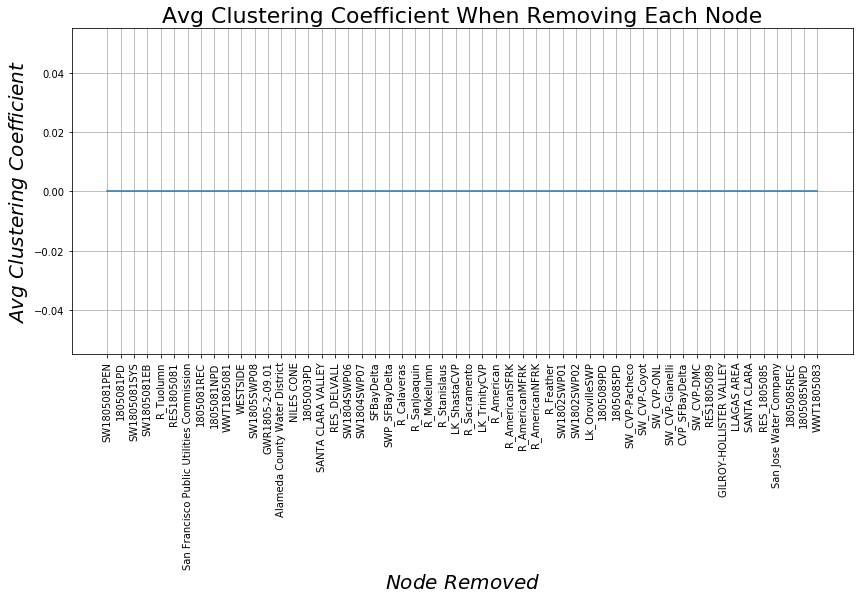

In [45]:
plt.figure(figsize = (14,6))
plt.plot(avg_CC)
plt.title('Avg Clustering Coefficient When Removing Each Node',fontsize=22)
plt.xticks(np.arange(num_nodes), [node_list[i] for i in range(0,num_nodes)], rotation='vertical')
plt.xlabel('$Node$ $Removed$',fontsize=20)
plt.ylabel('$Avg$ $Clustering$ $Coefficient$',fontsize=20)
plt.grid()
plt.show()

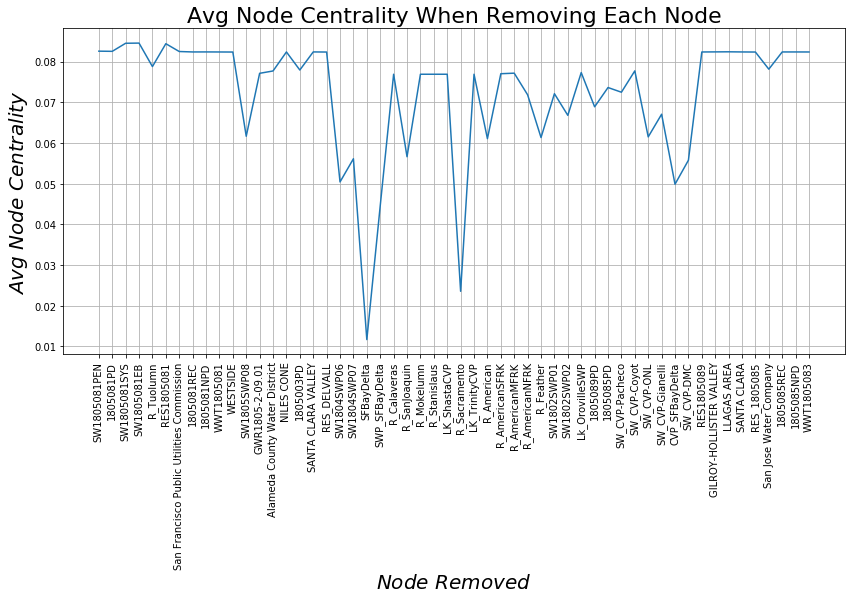

In [46]:
plt.figure(figsize = (14,6))
plt.plot(avg_centrality)
plt.title('Avg Node Centrality When Removing Each Node',fontsize=22)
plt.xticks(np.arange(num_nodes), [node_list[i] for i in range(0,num_nodes)], rotation='vertical')
plt.xlabel('$Node$ $Removed$',fontsize=20)
plt.ylabel('$Avg$ $Node$ $Centrality$',fontsize=20)
plt.grid()
plt.show()